In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import pathConfig as pc  # path config file imported
path = pc.PATH_CONFIG['pathData']


path = "C:/Users/Prem/Desktop/Projects/Final Year Project/uploadeddata/AnnotatedData3.csv" #ubunutu/linux


#path = "..\data\AnnotatedData3.csv"

def extract (path):
    fd= open(path,encoding="utf-8", errors='replace')
    df = pd.read_csv(fd)   
    defined=df['class'] != ("undefined")
    # #output dataframe without undeined
    df2=df[defined]
    defined1=df2['class'] !="Undefined"
    df4=df2[defined1]
    #replace no PI with no
    df3=df4.replace("No PI","no")
    #replace PI with yes
    final=df3.replace("PI","yes")
    
    replace_yes=final.replace("Yes","yes")
    final_df= replace_yes.replace("No","no")
    return final_df, df

final_data_frame, data_frame_undefined = extract(path)

final_data_frame.head()

,class,text
0,no,i'll buy the iphone x if it can get ac...
1,no,Some dude in FB selling the iPhone X 64 gb...
2,yes,Home dab emote man today and I get hopped on...
3,yes,Buy an iPhone X
4,no,I hate iOS 11. My iPhone 6+ works 10X slower...


yes    684
no     324
Name: class, dtype: int64


Text(0.5, 1.0, 'Count of Intention')

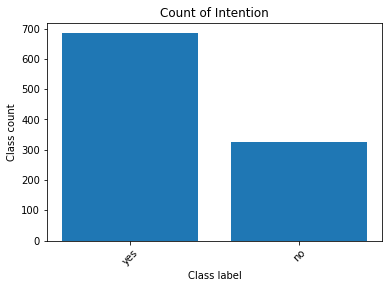

In [3]:
class_count=final_data_frame['class'].value_counts()
print(class_count)
Index = [1,2]
plt.bar(Index,class_count)
plt.xticks(Index,['yes','no'],rotation=45)
plt.ylabel('Class count')
plt.xlabel('Class label')
plt.title('Count of Intention')

In [4]:
frequent_words =  pd.Series(' '.join(final_data_frame['text']).lower().split()).value_counts()[:25]
print('top 25 words in the data')
print(frequent_words)

top 25 words in the data
iphone    1078
x          995
the        849
i          803
to         503
buy        298
get        294
a          290
and        279
my         278
is         227
an         212
it         192
for        192
like       168
want       164
you        150
but        145
so         143
this       142
in         139
of         133
me         132
that       132
.          123
dtype: int64


In [2]:
from wordcloud import WordCloud,STOPWORDS

negative_reviews = final_data_frame[final_data_frame['class'].isin(['no'])]
positive_reviews = final_data_frame[final_data_frame['class'].isin(['yes'])]

negative_reviews_str = negative_reviews.text.str.cat()
positive_reviews_str = positive_reviews.text.str.cat()

wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)


'from wordcloud import WordCloud,STOPWORDS\n\nnegative_reviews = final_data_frame[final_data_frame[\'class\'].isin([\'no\'])]\npositive_reviews = final_data_frame[final_data_frame[\'class\'].isin([\'yes\'])]\n\nnegative_reviews_str = negative_reviews.text.str.cat()\npositive_reviews_str = positive_reviews.text.str.cat()\n\nwordcloud_negative = WordCloud(background_color=\'white\').generate(negative_reviews_str)\nwordcloud_positive = WordCloud(background_color=\'white\').generate(positive_reviews_str)\n\nfig = plt.figure(figsize=(10,10))\n\nax1 = fig.add_subplot(211)\nax1.imshow(wordcloud_negative,interpolation=\'bilinear\')\nax1.axis("off")\nax1.set_title(\'Reviews with Negative Scores\',fontsize=20)\n\nax2 = fig.add_subplot(212)\nax2.imshow(wordcloud_positive,interpolation=\'bilinear\')\nax2.axis("off")\nax2.set_title(\'Reviews with Positive Scores\',fontsize=20)\n\nplt.show()'